<a href="https://colab.research.google.com/github/steflhermitte/EO-Notebooks/blob/master/PythonProgramming/RS_Notebook3_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" width="200" align='right'>](https://www.tudelft.nl/citg/over-faculteit/afdelingen/geoscience-remote-sensing/staff/scientific-staff/dr-stef-lhermitte)


# Image classification using Scikit-Learn
*Created by Stef Lhermitte (s.lhermitte at tudelft.nl / [@steflhermitte](https://twitter.com/StefLhermitte) | www.earthmapps.io)*

[![Twitter](https://img.shields.io/twitter/url/https/twitter.com/cloudposse.svg?style=social&label=%20%40steflhermitte)](https://twitter.com/steflhermitte)



## Machine learning: short intro 
*Check also Bouwplaats lecture 2*

In this notebook we are going to do a supervised classification / machine learning exercise on one of your previously downloaded satellite images. Machine learning  is establishing the relationship between a few characteristics (features or Xs; in this case satellite reflectance) of an entity with its other property (value or label or Y; in this case landuse type). Features are essentially the same as variables in a scientific experiment, they are characteristics of the phenomenon under observation that can be quantified or measured in some fashion. When these features are fed into a machine learning framework the network tries to discern relevant patterns between the features. These patterns are then used to generate the outputs of the framework/network. The outputs of the framework are often called "labels", as the output features have some label given to them by the network, some assumption about what category the output falls into. 

In a machine learning context, classification is a type of supervised learning. Supervised learning means that the data fed to the network is already labeled, with the important features/attributes already separated into distinct categories beforehand. This means that the network knows which parts of the input are important, and there is also a target or ground truth that the network can check itself against. 

The process of training a model is the process of feeding data into a neural network and letting it learn the patterns of the data. The training process takes in the data and pulls out the features of the dataset. During the training process for a supervised classification task the network is passed both the features and the labels of the training data. However, during testing, the network is only fed features.

The testing process is where the patterns that the network has learned are tested. The features are given to the network, and the network must predict the labels. The data for the network is divided into training and testing sets, two different sets of inputs. You do not test the classifier on the same dataset you train it on, as the model has already learned the patterns of this set of data and it would be extreme bias.

Instead, the dataset is split up into training and testing sets, a set the classifier trains on and a set the classifier has never seen before. 

Scikit-Learn provides easy access to numerous different classification algorithms. Among these classifiers are:
 - [K-Nearest Neighbors](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/)
 - [Support Vector Machines](https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/)
 - [Decision Tree Classifiers](https://stackabuse.com/decision-trees-in-python-with-scikit-learn/)/[Random Forests](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/)
 - [Naive Bayes](https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/)
 - [Linear Discriminant Analysis](https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/)
 
Classification tasks are any tasks that have you putting examples into two or more classes. Determining if an image is a cat or dog is a classification task, as is determining what the classifying satellite pixels in different classes.

Depending on the classification task at hand, you will want to use different classifiers. For instance, a logistic regression model is best suited for binary classification tasks, even though multiple variable logistic regression models exist. As you gain more experience with classifiers you will develop a better sense for when to use which classifier. However, a common practice is to instantiate multiple classifiers and compare their performance against one another, then select the classifier which performs the best.

In this notebook you are going to do an image classification of your neightborhood using the spectral characteristics of the satellite and some labels that you need to digitise yourself. In this example, we are going to read the labels from Open Streetmap, but in your assignment you will digitise the labels manually.


## Before you start
Before starting this notebook make sure that you installed the necessary packages (see [Python installation example notebook](https://colab.research.google.com/drive/1MccJkybH3jEDeQ8GkU7NmtbXP8ZE4V5M?usp=sharing)). For your local computer, you only need to install the packages once and you won't need the next cell. For Colab, you need to run the following installation steps every time you start a new notebook and restart the environment afterwards. 



In [2]:
!apt install libspatialindex-dev
!pip install osmnx
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cartopy geemap
!pip uninstall -y shapely    # cartopy and shapely aren't friends 
!pip install shapely --no-binary shapely
!pip install matplotlib-scalebar
!pip install pyepsg
!pip install owslib
!pip install scikit-learn
!pip install geopandas
!pip install rasterio
!pip install geemap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (639 kB/s)
Selecting previously unsel

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (134 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155256 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...


Found existing installation: Shapely 1.8.1.post1
Uninstalling Shapely-1.8.1.post1:
  Successfully uninstalled Shapely-1.8.1.post1
     |████████████████████████████████| 198 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.2-cp37-cp37m-linux_x86_64.whl size=665714 sha256=e5ffe6f51ab0cbfde45b4e66437c75d195c267e53e352e433f4dbae16317fdf8
  Stored in directory: /root/.cache/pip/wheels/2f/9e/07/e9e90942b4e31275785d2f7e455607bfe876e53906307f80cd
Successfully built shapely
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 216 kB 5.3 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/

For colab users: don't forget to restart your runtime after installation to avoid problems with matplotlib.

### Load the necessary packages

In [1]:
import cartopy.crs as ccrs
import osmnx as ox
from pyproj import CRS
import geopandas
import geemap
import ee
import rasterio
import rasterio.features
from rasterio.plot import reshape_as_raster, reshape_as_image
import os
import glob2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Now you need to authenticate Google Earth Engine and launch it in colab.



In [2]:
## Authenticate EE
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=DT6dg8GGVgxpyVj-DpWYDupHjaaJTVIQdeYAankM_dE&tc=hVec4FMuoi_KvnMrTJvrq7rVMU-ac0WqrjirpnYTQ2I&cc=-WGtmaUCGf5pohatamz4HWCRqT3ZUY7sjpqr81T41eo

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWgmcbNhEks6otd2ZbdOerIH051hORQTQO_l8wnljMyTYWJVz-MPOIg

Successfully saved authorization token.


In [3]:
# Launch EE
ee.Initialize()

## Creating pixel labels for classification
Before starting a satellite classification exercise, we need pixel labels that identify each pixel to a class (e.g. the landcover type_. These labels could come from an external data set, or could be manually created. 

### Loading labels

For example, we could load them from OpenStreetmap (See Notebook 1, for how to do this):

In [4]:
bl=ox.geometries.geometries_from_bbox(north=52.01, south=51.98, east=4.39, west=4.36,tags={'building': True})

In [5]:
lu=ox.geometries.geometries_from_bbox(north=52.01, south=51.98, east=4.39, west=4.36,tags={'landuse': True})

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


From these OpenStreetMap polygons, we can, for example, subsequently select only the landuse classes that are either grass (`lu['landuse']=='grass'`) or forest (`lu['landuse']=='grass'`)

In [8]:
# Create vegetation class by selecting only grass and forest from the landuse
gr=lu[lu['landuse']=='grass']
fo=lu[lu['landuse']=='forest']
print(gr)

                      barrier  \
element_type osmid              
way          32017869     NaN   
             32738712     NaN   
             42621237     NaN   
             45873458     NaN   
             45878128     NaN   
...                       ...   
relation     13680788     NaN   
             13721605     NaN   
             13721606     NaN   
             13974345     NaN   
             13989102     NaN   

                                                                geometry  \
element_type osmid                                                         
way          32017869  POLYGON ((4.37070 52.00186, 4.37067 52.00185, ...   
             32738712  POLYGON ((4.36957 52.00057, 4.36983 52.00018, ...   
             42621237  POLYGON ((4.37582 52.00799, 4.37591 52.00789, ...   
             45873458  POLYGON ((4.38705 51.99949, 4.38710 51.99931, ...   
             45878128  POLYGON ((4.38975 52.00360, 4.38972 52.00354, ...   
...                                   

Or digitalise them manually (e.g. [geojson.oi](http://www.geojson.io), see short [introduction video](https://tudelft.zoom.us/rec/share/zpHPYR8Nz3KbRUi1Jb7H-wW6f59jbEP6RitC_HlTf5g4wkFhA__16q6WKsOkIVAh.OxaRB6K9itNs_NSp) (Passcode: `+=&1$JUX`) on how to digitise using geojson.io) and open the created polygon that contains the polygons for manually defined class. For example, in this example, we manually digitised a water class with two polygons and saved it as a water.json file.

![](https://github.com/steflhermitte/EO-Notebooks/blob/master/PythonProgramming/water_geojson.png?raw=1)

We can load this digitised geojson polygons as geopandas (See also Notebook 1):

In [ ]:
filename='/content/water.geojson'
water = geopandas.read_file(filename)
water = water.set_crs(epsg=4326)
water

### Loading satellite imagery

These polygons are vectors and in the classsification we need raster labels (i.e. every pixel needs to have a label). Therefore, we need to rasterize the polygons. Before doing that we need to load the satellite image we want to classify in order to copy the image extent, geometry, etc. Based on Notebook 2 we can load the satellite imagery:

In [9]:
# Define region of interest
rectangle = ee.Geometry.Rectangle([4.36, 51.98, 4.39, 52.01])
# Load collection and filter by region, data and cloud cover metadata
S2 = (ee.ImageCollection('COPERNICUS/S2_SR')
         .filterBounds(rectangle)
         .filterDate('2021-01-01', '2021-12-31')
         .filterMetadata('CLOUDY_PIXEL_PERCENTAGE','less_than',20))
# Subset to take only reflectance bands starting with B
S2 = S2.select('B.*')

In [10]:
# Export imagery
out_dir = '/content/'
geemap.ee_export_image_collection(S2, out_dir='/content', scale=10, region=rectangle, file_per_band=False, crs='EPSG:3857')

Total number of images: 11

Exporting 1/11: 20210125T105331_20210125T105443_T31UET.tif
Generating URL ...
Please wait ...
Data downloaded to /content/20210125T105331_20210125T105443_T31UET.tif


Exporting 2/11: 20210326T105031_20210326T105256_T31UET.tif
Generating URL ...
Please wait ...
Data downloaded to /content/20210326T105031_20210326T105256_T31UET.tif


Exporting 3/11: 20210331T104619_20210331T104618_T31UET.tif
Generating URL ...
Please wait ...
Data downloaded to /content/20210331T104619_20210331T104618_T31UET.tif


Exporting 4/11: 20210420T104619_20210420T104615_T31UET.tif
Generating URL ...
Please wait ...
Data downloaded to /content/20210420T104619_20210420T104615_T31UET.tif


Exporting 5/11: 20210530T104619_20210530T104621_T31UET.tif
Generating URL ...
Please wait ...
Data downloaded to /content/20210530T104619_20210530T104621_T31UET.tif


Exporting 6/11: 20210609T104619_20210609T105522_T31UET.tif
Generating URL ...
Please wait ...
Data downloaded to /content/20210609T104619

Then we can make a list of the filenames (see Notebook 2):

In [11]:
# Create a list of the exported images
filelist = glob2.glob(out_dir+'*.tif')
# Print filelist to check contents
filelist

['/content/20210326T105031_20210326T105256_T31UET.tif',
 '/content/20210729T104619_20210729T104626_T31UET.tif',
 '/content/20210907T104619_20210907T105253_T31UET.tif',
 '/content/20210530T104619_20210530T104621_T31UET.tif',
 '/content/20210420T104619_20210420T104615_T31UET.tif',
 '/content/20210614T105031_20210614T105443_T31UET.tif',
 '/content/20210125T105331_20210125T105443_T31UET.tif',
 '/content/20211221T105451_20211221T105449_T31UET.tif',
 '/content/20210331T104619_20210331T104618_T31UET.tif',
 '/content/20210609T104619_20210609T105522_T31UET.tif',
 '/content/20211216T105349_20211216T105434_T31UET.tif']

and select one of the files. E.g. `filelist[0]` gives the first file of this list, `filelist[1]` the second etc.

In [12]:
image_file = filelist[0]

Then we can read in the file using rasterio (Similar to Notebook 2)

In [13]:
# Read image using rasterio
imr = rasterio.open(image_file)
im = imr.read()

The satellite images are raster values between `0` a `10000`, so they need to be rescaled and converted to image format:

In [14]:
# Apply image scaling (see metadata) to set to reflectance
im = im * 0.0001
im = reshape_as_image(im)

### Rasterize labels into training image

Subsequently, the polygons we have from OpenStreetMap or after manual digitization can be rasterized using the [rasterio rasterize function](https://rasterio.readthedocs.io/en/stable/api/rasterio.features.html#rasterio.features.rasterize). Before doing this, we need to assure that our vectors with labels and imagery have the same projection. Therefore, in this case, we need to reproject to 'EPSG:3857' since we also exported the satellite imagery in this format. However, the choice of projection system always depends on your choice (for a specific project) and can be adapted if needed.

In [15]:
# Reproject OSM footprints
bl2 = ox.project_gdf(bl,to_crs=CRS.from_epsg(3857))
gr2 = ox.project_gdf(gr,to_crs=CRS.from_epsg(3857))
fo2 = ox.project_gdf(fo,to_crs=CRS.from_epsg(3857))

Or you can reproject the manually defined polygons (which you have read in before as geopandas) using the `to_crs()` geopandas function:

In [ ]:
# Reproject mannually defined polygons
wa2 = water.to_crs(epsg=3857)

Once the data are in corresponding projection systems, we can rasterize our label vectors to label images using the rasterize function:

In [ ]:
?rasterio.features.rasterize

When applying the `rasterize` function, we assign different labels to each class using the `[(x, label) for x in features]` line. In this list, that contains a `for`-loop we  loop over all features and make a tuple per features that contains `(feature,label)`:

In [16]:
gr_pol = [(x, 1) for x in gr2['geometry']]

[(<shapely.geometry.polygon.Polygon at 0x7f1376566a10>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566a50>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f13765668d0>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566610>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f13765669d0>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566ad0>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566a90>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566b10>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566b50>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566b90>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566bd0>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566c10>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566c50>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566c90>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566cd0>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f1376566d10>, 1),
 (<shapely.geometry.polygon.Polygon at 0

In the output above you can see that it is a list of typles that contain for every grass polygon, the label `1`. Similarly, we can make such a list for the polygons of the other classes, where we assign `class=2` to forest and `class=3` to buildings.

In [17]:
fo_pol = [(x, 2) for x in fo2['geometry']]
bl_pol = [(x, 2) for x in bl2['geometry']]

Now we can merge these lists of polygons and labels into one large list:

For example, we assign the `class=1` to water, `class=2` to vegetation and `class=3` to buildings and we use the image shape (`imr.shape`) and projection (`imr.transform`). Note also that after the first call, we specify `out=lab` to make sure that the rasterized version are burned into the previous version of `lab`.  If not specified the file is overwritten.

In [16]:
lab = rasterio.features.rasterize(
    [(x, 1) for x in gr2['geometry']], # Assign label 1 to grass
    out_shape=imr.shape,                 # Defines output shape
    transform=imr.transform,             # Defines output projection/transform
    fill=0,                              # Defines fill  value
    all_touched=True,                    # If True, all pixels touched by geometries will be burned in.
    dtype=rasterio.float32, )            # Data types
lab = rasterio.features.rasterize(
    [(x, 2) for x in fo2['geometry']], # Assign label 2 to forest
    out_shape=imr.shape,                # Defines output shape
    transform=imr.transform,            # Defines output projection/transform
    # out=lab,                            # Add it to previous version of lab, if not specified the file is overwritten
    fill=0,                             # Defines fill  value
    all_touched=True,                   # If True, all pixels touched by geometries will be burned in.
    dtype=rasterio.float32, )           # Data types
lab = rasterio.features.rasterize(
    [(x, 3) for x in bl2['geometry']], # Assign label 3 to buildings
    out_shape=imr.shape,
    transform=imr.transform,
    out=lab,
    fill=0,
    all_touched=True,
    dtype=rasterio.float32, )

If we now simply plot the rasterized polygons, we see that each polygon is burned in an empty raster with the corresponding label. In this case, we have several building and vegetation training areas and only two water training areas. We compare with the satellite image, we see that the vegetation show red in the FCC image,that the water is mostly dark (i.e., low reflectance), and that the building class is very diverse.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


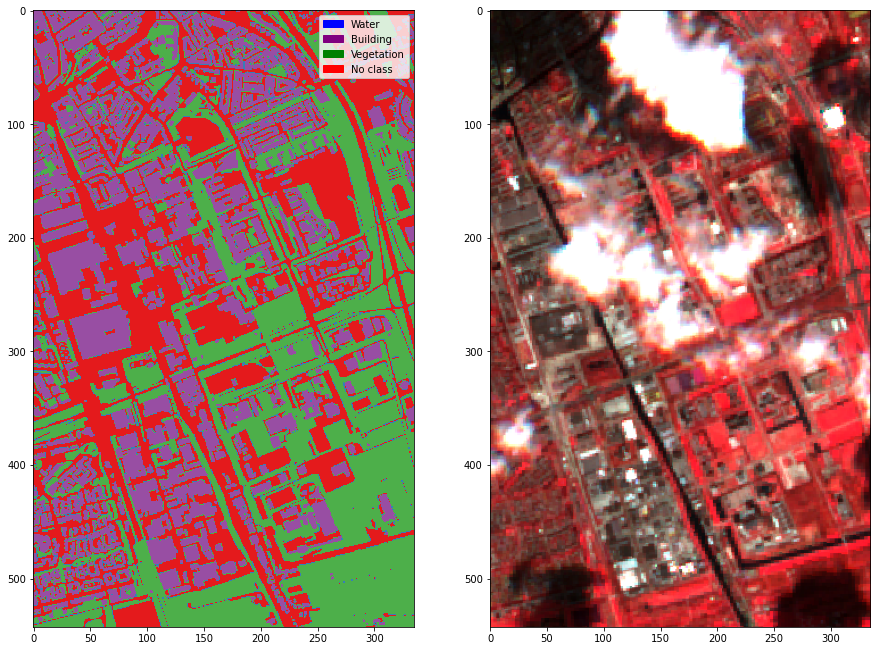

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(lab,vmin=0,vmax=8.,cmap='Set1')
ax[1].imshow(im[:,:,(8,3,2)]*3)

# Adding a legend
bl_patch = mpatches.Patch(color='purple', label='Building')
# wa_patch = mpatches.Patch(color='blue', label='Water')
vg_patch = mpatches.Patch(color='green', label='Vegetation')
no_patch = mpatches.Patch(color='red',label='No class')
ax[0].legend(handles=[wa_patch,bl_patch,vg_patch,no_patch],loc='upper right')

## Training the classification

Once we have the labels, now let's see how to implement a classifier. 
The first step in implementing a classifier is to import the classifier you need into Python. Let's look at the import statement for K-Nearest Neighbors:

In [19]:
from sklearn.neighbors import KNeighborsClassifier

Scikit-Learn has other classifiers as well, and their respective documentation pages will show how to import them, but in general it is very similar:

In [20]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Defining a classifier
After this, the classifier must be instantiated. Instantiation is the process of bringing the classifier into existence within your Python program - to create an instance of the classifier/object.

This is typically done just by making a variable and calling the function associated with the classifier:

In [21]:
KNN_model = KNeighborsClassifier()
SVC_model = SVC()
RFC_model = RandomForestClassifier()

We can off course further finetune the classifier by adding additional arguments to the initiation. See the help for each classifier for more information.

In [ ]:
?KNeighborsClassifier

Now the classifier needs to be trained. In order to accomplish this, the classifier must be fit with the training data. The model will learn to decide on a pixel class based on the respective reflectane values across all the bands.

Therefore we need to extract both the pixel labels and pixel reflectance data. In order to do this we need to reorganize the image data as the multispectral image should have the same number of features (bands) stacked in the same order. This implies changing the shape of the image to a two-dimensional array, which is expected by the majority of ML algorithms, where each row represents a pixel. 

![](https://miro.medium.com/max/4048/1*DP57Bv0fS9oIWP2Bdvm4-A.jpeg)

The current shape of the image is 543x335 pixels x 12 bands:

In [22]:
print(im.shape)

(543, 335, 12)


and we reshape it to a matrix where each pixel represents a row and each band represents a column:

In [23]:
mat_ft=np.reshape(im,(-1, 12)) # Reshape the image to number-of-pixels x number-of-bands
print(np.shape(mat_ft))

(181905, 12)


Similarly we need to reshape the labels to a one-column label per pixel:

In [24]:
mat_lb=np.reshape(lab,(-1,1)) # Reshape the image to numbber-of-pixels x number-of-labels
print(np.shape(mat_lb))

(181905, 1)


Subsequently, we remove all pixels without a class by subsetting to only the pixels that have a class (i.e., in our example all pixels with 'label=o'). So if we look at the label column we can get the labels by

In [25]:
mat_lb[:,0]

array([0., 3., 3., ..., 2., 2., 2.], dtype=float32)

and subsequently use that to only subset to the rows (i.e. pixels) where the label is not 0 (i.e. `mat_lb[:,0]!=0`)

In [26]:
mat_ft=mat_ft[mat_lb[:,0]!=0,:]
mat_lb=mat_lb[mat_lb[:,0]!=0,:]
print(np.shape(mat_ft))
print(np.shape(mat_lb))

(114979, 12)
(114979, 1)


If we do this, you can see that the amount of pixels reduces from 181905 to 112350.

### Understanding the class reflectances
If we want to understand how these classes look like in the satellite data, we can plot the mean +- standard deviation for each class in a spectral plot. This gives us an idea of the spectra of each class and how well these can be separated.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


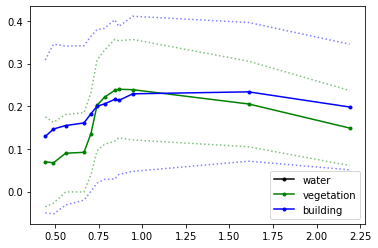

In [27]:
# Define the wavelengths corresponding to 
wl=[0.443,0.490,0.560,0.665,0.705,0.740,0.783,0.842,0.865,0.945,1.610,2.190]
colors=['black','green','blue']
clas= ['water','vegetation','building']

for i,color in enumerate(colors):
    plt.plot(wl,np.mean(mat_ft[mat_lb[:,0]==i+1],axis=0),color=color,linestyle='-',marker='.',label=clas[i])
    plt.plot(wl,np.mean(mat_ft[mat_lb[:,0]==i+1],axis=0)+np.std(mat_ft[mat_lb[:,0]==i+1],axis=0),color=color,linestyle=':',alpha=.5)
    plt.plot(wl,np.mean(mat_ft[mat_lb[:,0]==i+1],axis=0)-np.std(mat_ft[mat_lb[:,0]==i+1],axis=0),color=color,linestyle=':',alpha=.5)
plt.legend()

In the previous plot, we see the typical characteristics of each class with a low reflectance of water, a high reflectance of vegetation in the NIR bands and an intermediate signal of built-up area.


### Splitting in training/testing
Once the data has been preprocessed, the data must be split into training and testing sets. This is done to make sure that the model has not seen the test data and it performs equally well on new data. Otherwise, the model will overfit and perform well only on training data. Splitting can easily be done in Scikit-Learn with a helpful function called train_test_split. In the next example, we take 30% for testing and 70% for training as you can see in the resulting sizes

In [28]:
xTrain, xTest, yTrain, yTest = train_test_split(mat_ft, mat_lb, test_size=0.3)

print(xTrain.shape)
print(yTrain.shape)

print(xTest.shape)
print(yTest.shape)

(80485, 12)
(80485, 1)
(34494, 12)
(34494, 1)


### Train the model
Once we have training data, we can start training the model. This can be done easily with the `fit` command that will fit a model between the labels (i.e. Y data, in this case the landcover classes) and the features (i.e. X data,  in this case the spectral reflectance) The training features and the training labels are passed into the classifier with the fit command:

In [29]:
KNN_model.fit(xTrain, yTrain.ravel())

KNeighborsClassifier()

### Apply the model
After the classifier model has been trained on the training data, we can apply the model and use it to make predictions on the testing data.

This is easily done by calling the predict command on the classifier and providing it with the parameters it needs to make predictions about, which are the features in your testing dataset:

In [30]:
KNN_prediction = KNN_model.predict(xTest)
KNN_prediction

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:498: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  counts = np.zeros(a_view.shape[:-1], dtype=np.int)


array([2., 2., 2., ..., 3., 2., 3.], dtype=float32)

Or we can apply the model to all pixels in our dataset

In [31]:
# Reread data
mat_ft1=np.reshape(im,(-1, 12)) # Reshape the image to number-of-pixels x number-of-bands
# Predict
KNN_pred1 = KNN_model.predict(mat_ft1)
# Reshape predicted back to image
im_pred = np.reshape(KNN_pred1, (imr.height, imr.width))

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:498: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  counts = np.zeros(a_view.shape[:-1], dtype=np.int)


The result of this `predict` is a predicted class for each testing pixel based on the reflectances of that pixel.

### Classifier evaluation
Once we have trained and applied our model, we should evaluate how the classifier performed. There are multiple methods of evaluating a classifier's performance (see also lecture 2). One way to do it is to compare the labels of the test data, which were not used when fitting the model, with the predicted labels. This is also the reason why you need to split between training and testing data sets.

To do this iin Scikit-Learn you just pass in the predictions against the ground truth labels which were stored in your test labels. When doing this, you can calculate the accuracy, the confusion matrix or other derived accuracy statistics:

In [32]:
# Accuracy score is the simplest way to evaluate
print('Accuracy KNN:\n',accuracy_score(KNN_prediction, yTest))
# But Confusion Matrix and Classification Report give more details about performance
print('Confusion KNN:\n',confusion_matrix(KNN_prediction, yTest))
print('Class report KNN:\n',classification_report(KNN_prediction, yTest))

Accuracy KNN:
 0.9172319823737461
Confusion KNN:
 [[16539  1580]
 [ 1275 15100]]
Class report KNN:
               precision    recall  f1-score   support

         2.0       0.93      0.91      0.92     18119
         3.0       0.91      0.92      0.91     16375

    accuracy                           0.92     34494
   macro avg       0.92      0.92      0.92     34494
weighted avg       0.92      0.92      0.92     34494



Similarly, it can be insightfull to make a map of your classified input vs output

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


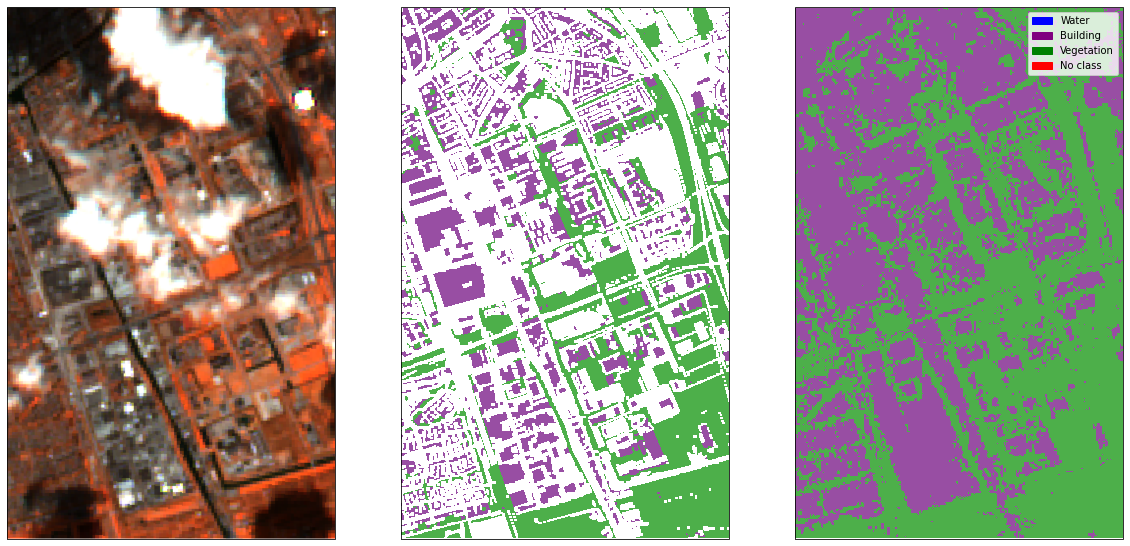

In [33]:
crs=ccrs.PlateCarree()
ext=[4.36,4.39,51.98,52.01]
fig, axes = plt.subplots(1, 3,figsize=(20,20), subplot_kw={'projection': ccrs.epsg(3857)})
axes[0].set_extent(ext,crs=crs)
axes[1].set_extent(ext,crs=crs)
axes[2].set_extent(ext,crs=crs)
axes[0].imshow(im[:,:,(8,4,3)]*2.5,extent=ext,transform=crs,origin='upper')
lab[lab==0]=np.nan
axes[1].imshow(lab,cmap='Set1',vmax=8.,vmin=0,extent=ext,transform=crs,origin='upper')
axes[2].imshow(im_pred,cmap='Set1',vmax=8,vmin=0,extent=ext,transform=crs,origin='upper')

# Adding a legend
bl_patch = mpatches.Patch(color='purple', label='Building')
wa_patch = mpatches.Patch(color='blue', label='Water')
vg_patch = mpatches.Patch(color='green', label='Vegetation')
axes[2].legend(handles=[wa_patch,bl_patch,vg_patch,no_patch],loc='upper right')

## Extrapolation of model
Finally, after testing/validation, the classifier can also be applied to the complete dataset or a different image:

In [34]:
# Select a different file from the list
image_file = filelist[3]
# Read image using rasterio
imr2 = rasterio.open(image_file)
im2 = imr2.read()
# Apply image scaling (see metadata) to set to reflectance
im2 = im2 * 0.0001
im2 = reshape_as_image(im2)

In [35]:
# Reshape
mat_ft2=np.reshape(im2,(-1, 12)) # Reshape the image to number-of-pixels x number-of-bands
# Predict
KNN_pred2 = KNN_model.predict(mat_ft2)
# Reshape predicted back to image
im2_pred = np.reshape(KNN_pred2, (imr2.height, imr2.width))

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:498: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  counts = np.zeros(a_view.shape[:-1], dtype=np.int)


Let's check how it looks like on a map

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


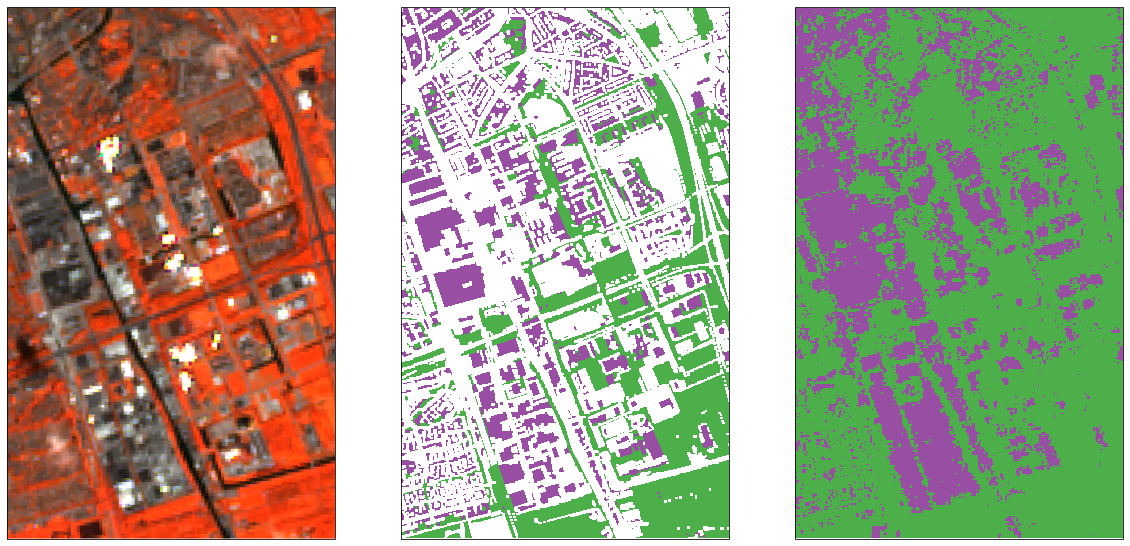

In [36]:
crs=ccrs.PlateCarree()
ext=[4.36,4.39,51.98,52.01]
fig, axes = plt.subplots(1, 3,figsize=(20,20), subplot_kw={'projection': ccrs.epsg(3857)})
axes[0].set_extent(ext,crs=crs)
axes[1].set_extent(ext,crs=crs)
axes[2].set_extent(ext,crs=crs)
axes[0].imshow(im2[:,:,(8,4,3)]*2.5,extent=ext,transform=crs,origin='upper')
lab[lab==0]=np.nan
axes[1].imshow(lab,cmap='Set1',vmax=8.,vmin=0,extent=ext,transform=crs,origin='upper')
axes[2].imshow(im2_pred,cmap='Set1',vmax=8,vmin=0,extent=ext,transform=crs,origin='upper')

These results show that we can use classification to fill in missing pixels and provide a complete classification coverage. 